
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [1]:
student_number = "400104801"
Name = "Mehran"
Last_Name = "Bakhtiari"

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.4 MB/s eta 0:00:00


## imports

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off')
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [4]:
env = gym.make("MountainCar-v0", render_mode='rgb_array', max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



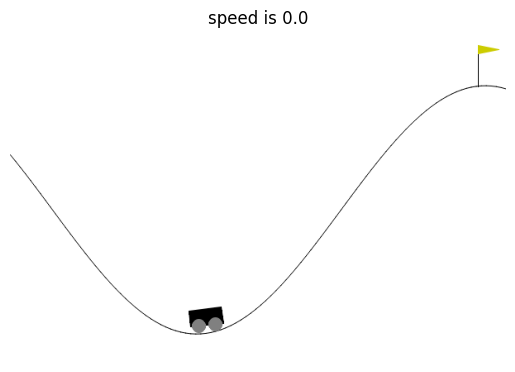

In [5]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


Step 1:
Action: 0
New state: [-0.5726321  -0.00063831]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 2:
Action: 1
New state: [-5.7290399e-01 -2.7188635e-04]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 3:
Action: 2
New state: [-0.5718074   0.00109656]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 4:
Action: 2
New state: [-0.56935054  0.00245686]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 5:
Action: 2
New state: [-0.56555164  0.00379892]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}



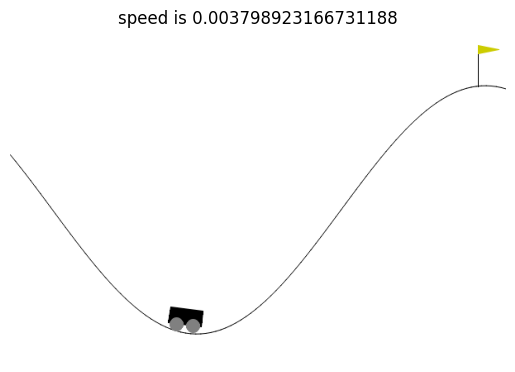

Step 6:
Action: 1
New state: [-0.56143886  0.00411274]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 7:
Action: 2
New state: [-0.55604297  0.00539593]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 8:
Action: 1
New state: [-0.5504041   0.00563888]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 9:
Action: 1
New state: [-0.54456437  0.0058397 ]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 10:
Action: 2
New state: [-0.53756756  0.00699684]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}



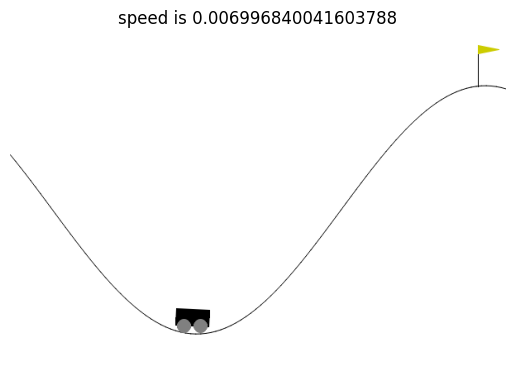

Step 11:
Action: 0
New state: [-0.53146595  0.00610158]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 12:
Action: 0
New state: [-0.5263054   0.00516057]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 13:
Action: 1
New state: [-0.52112454  0.00518087]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 14:
Action: 1
New state: [-0.5159622   0.00516232]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 15:
Action: 1
New state: [-0.51085716  0.00510505]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}



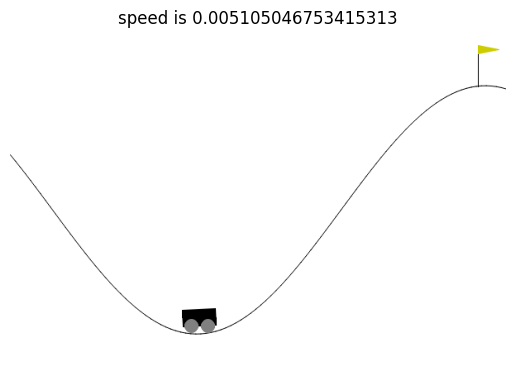

Step 16:
Action: 2
New state: [-0.50484765  0.00600951]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 17:
Action: 1
New state: [-0.4989787   0.00586895]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 18:
Action: 2
New state: [-0.49229422  0.00668447]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 19:
Action: 1
New state: [-0.4858442   0.00645003]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}

Step 20:
Action: 2
New state: [-0.47867674  0.00716747]
Reward: -1.0
Is terminated: False
Is truncated: False
Extra info: {}



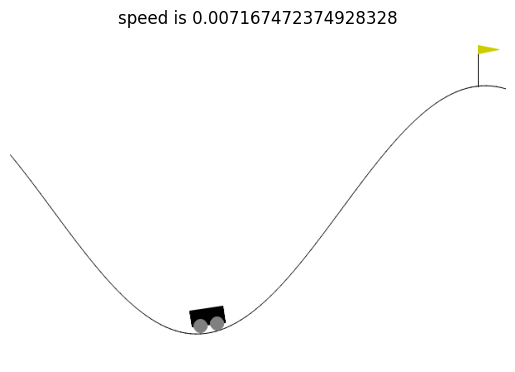

(array([-0.5218625,  0.       ], dtype=float32), {})

In [6]:
env.reset()

num_steps = 20

actions = [random.choice([0, 1, 2]) for _ in range(num_steps)]

for i, action in enumerate(actions):
    new_state, reward, is_terminated, is_truncated, extra_info = env.step(action)

    print(f"Step {i + 1}:")
    print(f"Action: {action}")
    print(f"New state: {new_state}")
    print(f"Reward: {reward}")
    print(f"Is terminated: {is_terminated}")
    print(f"Is truncated: {is_truncated}")
    print(f"Extra info: {extra_info}")
    print()

    if (i + 1) % 5 == 0:
        visualize(env)

    if is_terminated or is_truncated:
        print("Episode finished. Resetting the environment.")
        env.reset()
        break

env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [7]:
class MountainCarQL:

    def __init__(self, env, discrete_size=20):
        self.discrete_size = discrete_size
        self.env = env
        self.q_values = self.create_q_values_list()
        self.policy = {}

        self.position_bounds = np.linspace(env.observation_space.low[0], env.observation_space.high[0], discrete_size)
        self.velocity_bounds = np.linspace(env.observation_space.low[1], env.observation_space.high[1], discrete_size)

    def create_q_values_list(self):
        q_table_shape = (self.discrete_size, self.discrete_size, self.env.action_space.n)
        q_table = np.zeros(q_table_shape)
        return q_table

    def get_discrete_state(self, state):
        position, velocity = state
        discrete_position = np.digitize(position, self.position_bounds) - 1
        discrete_velocity = np.digitize(velocity, self.velocity_bounds) - 1
        return discrete_position, discrete_velocity

    def learn(self, num_episodes, alpha, gamma, epsilon, epsilon_decay=0.995, min_epsilon=0.01):
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.get_discrete_state(state)

            done = False
            while not done:
                if random.uniform(0, 1) < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.q_values[discrete_state])

                new_state, reward, terminated, truncated, _ = self.env.step(action)
                new_discrete_state = self.get_discrete_state(new_state)

                if terminated or truncated:
                    done = True
                    reward = -1 if terminated else reward

                old_value = self.q_values[discrete_state + (action,)]
                next_max = np.max(self.q_values[new_discrete_state])

                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                self.q_values[discrete_state + (action,)] = new_value

                discrete_state = new_discrete_state

            epsilon = max(min_epsilon, epsilon * epsilon_decay)

    def create_policy(self):
        for position in range(self.discrete_size):
            for velocity in range(self.discrete_size):
                self.policy[(position, velocity)] = np.argmax(self.q_values[position, velocity])

    def act(self):
        state = self.env.reset()[0]
        discrete_state = self.get_discrete_state(state)
        done = False

        while not done:
            action = self.policy[discrete_state]
            new_state, _, terminated, truncated, _ = self.env.step(action)
            visualize(self.env)
            discrete_state = self.get_discrete_state(new_state)

            if terminated or truncated:
                done = True

    def evaluate(self, num_episodes):
        total_rewards = 0
        success_count = 0

        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.get_discrete_state(state)
            done = False
            episode_reward = 0

            while not done:
                action = self.policy[discrete_state]
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                discrete_state = self.get_discrete_state(new_state)
                episode_reward += reward

                if terminated:
                    success_count += 1
                    done = True
                elif truncated:
                    done = True

            total_rewards += episode_reward

        average_reward = total_rewards / num_episodes
        win_percentage = (success_count / num_episodes) * 100
        return average_reward, win_percentage

train your agent with good parameters

In [8]:
EPISODES = 10000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 1.0
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01
DISCRETE_SIZE = 20

mountain_car_ql = MountainCarQL(env,discrete_size=DISCRETE_SIZE)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [9]:
mountain_car_ql.create_policy()

average_reward, win_percentage = mountain_car_ql.evaluate(200)
print(f"Average Reward: {average_reward}, Win Percentage: {win_percentage}%")

Average Reward: -137.46, Win Percentage: 100.0%


show the path your car took for only one episode. Use visualize function every 10 frame.

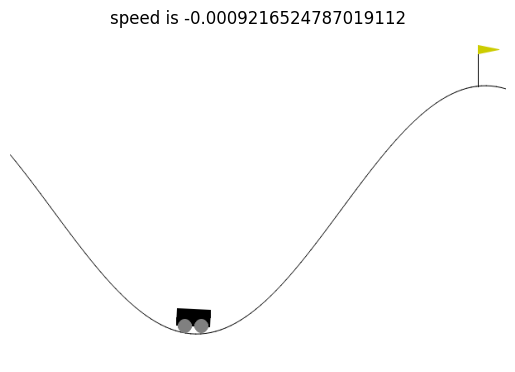

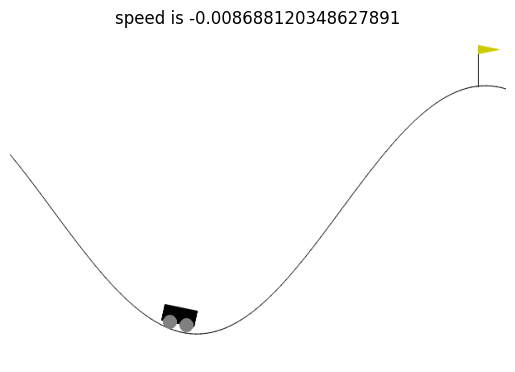

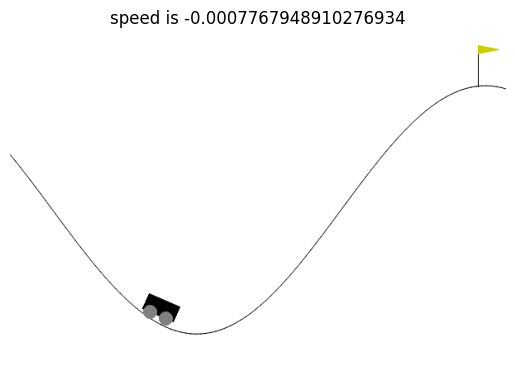

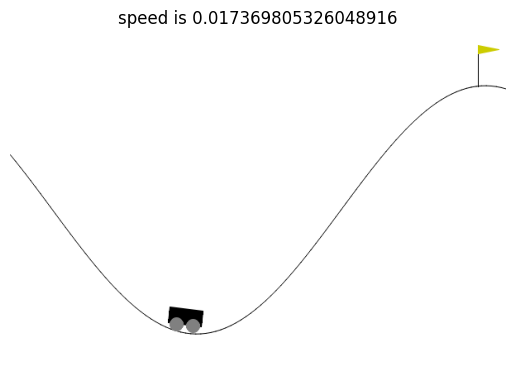

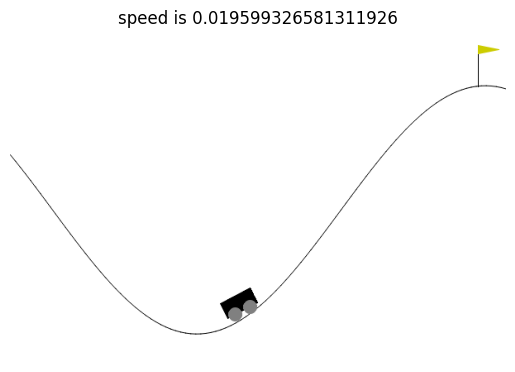

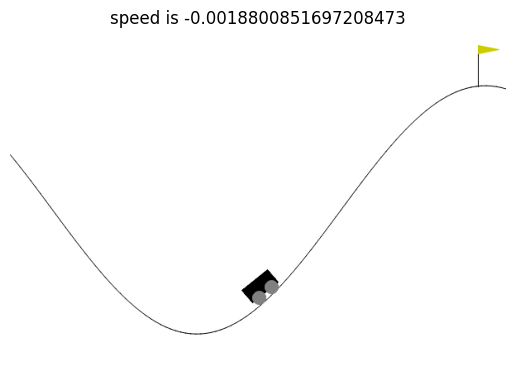

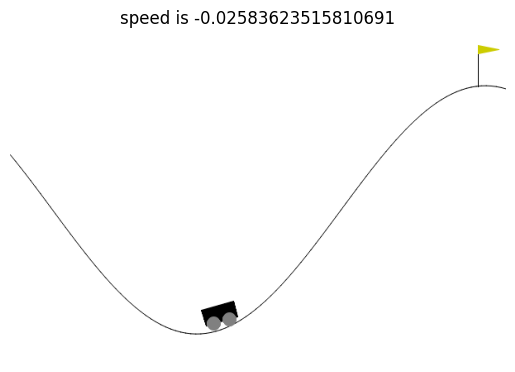

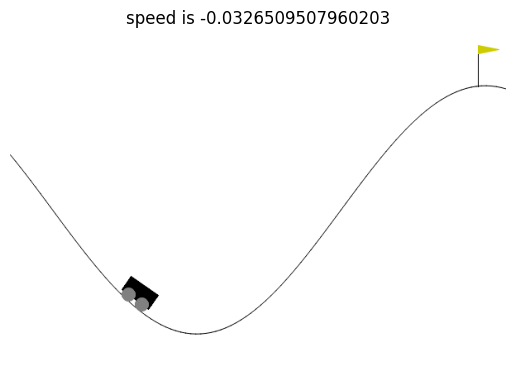

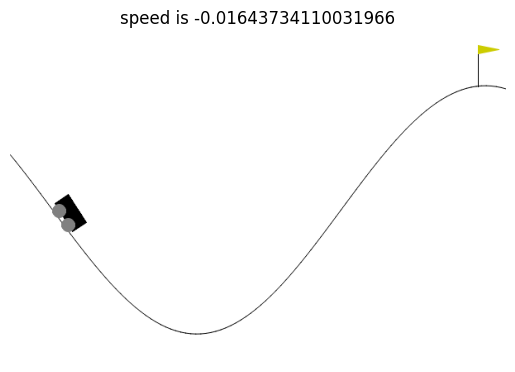

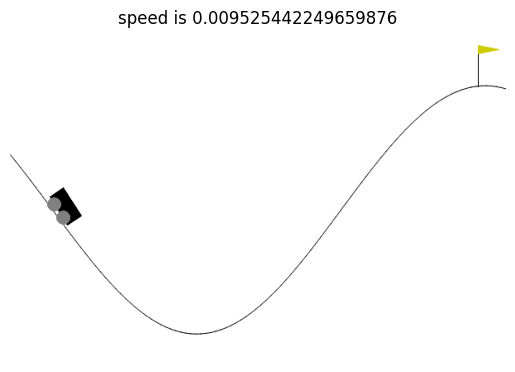

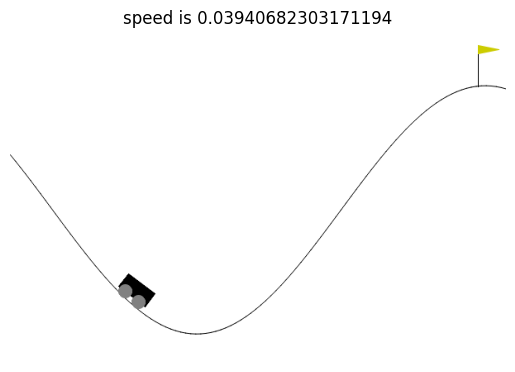

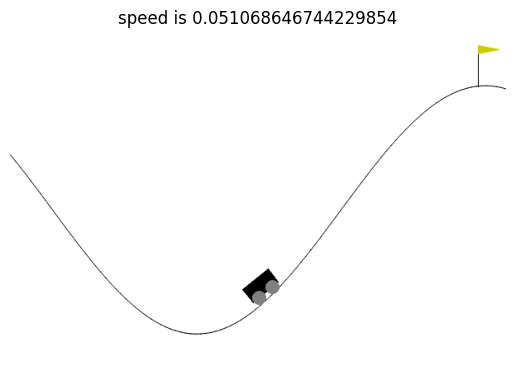

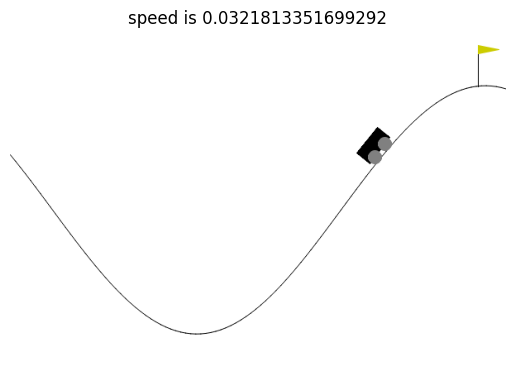

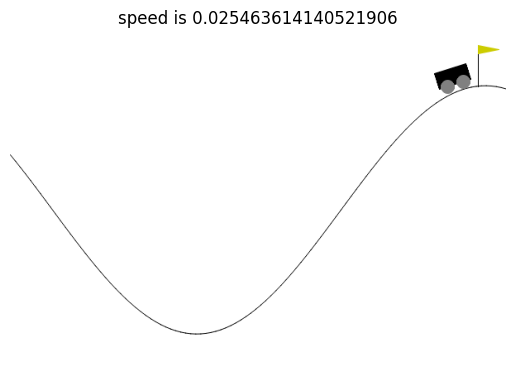

In [40]:
state = env.reset()[0]
discrete_state = mountain_car_ql.get_discrete_state(state)
done = False
step_count = 0

while not done:
    action = mountain_car_ql.policy[discrete_state]
    new_state, _, terminated, truncated, _ = env.step(action)
    if step_count % 10 == 0:
        visualize(env)
    discrete_state = mountain_car_ql.get_discrete_state(new_state)
    step_count += 1
    if terminated or truncated:
        done = True

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [11]:
class MountainCarSarsa(MountainCarQL):
    def learn(self, num_episodes, alpha, gamma, epsilon, epsilon_decay=0.995, min_epsilon=0.01):
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            discrete_state = self.get_discrete_state(state)

            if random.uniform(0, 1) < epsilon:
                action = self.env.action_space.sample()
            else:
                action = np.argmax(self.q_values[discrete_state])

            done = False
            while not done:
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                new_discrete_state = self.get_discrete_state(new_state)

                if random.uniform(0, 1) < epsilon:
                    next_action = self.env.action_space.sample()
                else:
                    next_action = np.argmax(self.q_values[new_discrete_state])

                if terminated or truncated:
                    done = True
                    reward = -1 if terminated else reward

                old_value = self.q_values[discrete_state + (action,)]
                next_value = self.q_values[new_discrete_state + (next_action,)]

                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
                self.q_values[discrete_state + (action,)] = new_value

                discrete_state = new_discrete_state
                action = next_action

            epsilon = max(min_epsilon, epsilon * epsilon_decay)

train your agent with good parameters

In [36]:
EPISODES = 10000
LEARNING_RATE = 0.1
DISCOUNT = 0.99
EPSILON = 1.0
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01
DISCRETE_SIZE = 20

mountain_car_sarsa = MountainCarSarsa(env, discrete_size=DISCRETE_SIZE)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON, EPSILON_DECAY, MIN_EPSILON)

evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [37]:
mountain_car_sarsa.create_policy()

average_reward, win_percentage = mountain_car_sarsa.evaluate(200)
print(f"Average Reward: {average_reward}, Win Percentage: {win_percentage}%")

Average Reward: -163.345, Win Percentage: 94.0%


show the path your car took for only one episode. Use visualize function every 10 frame.

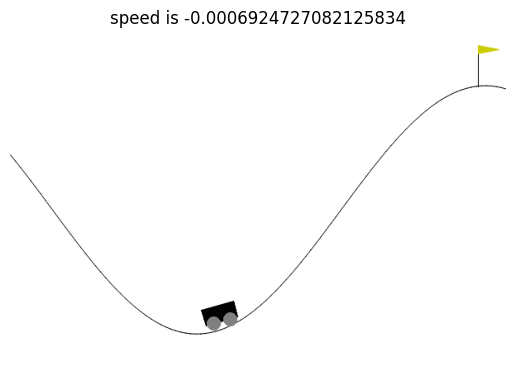

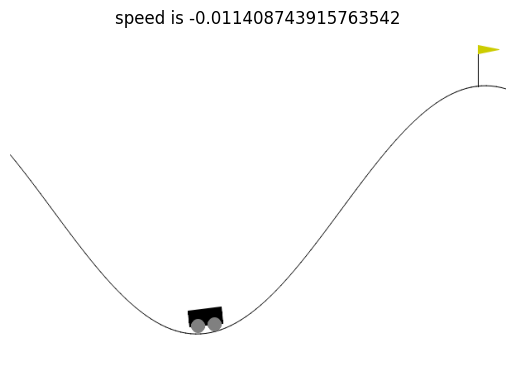

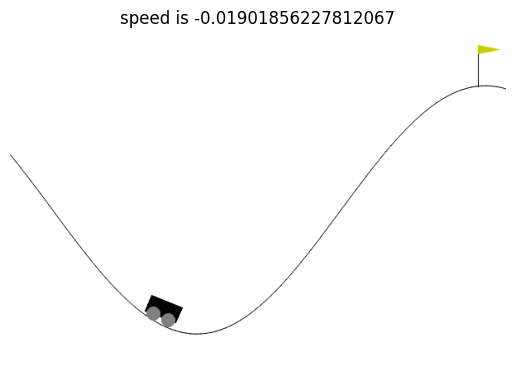

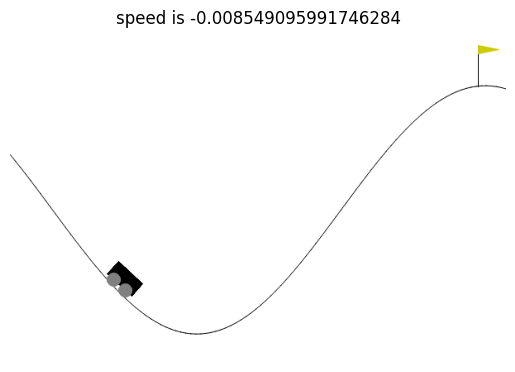

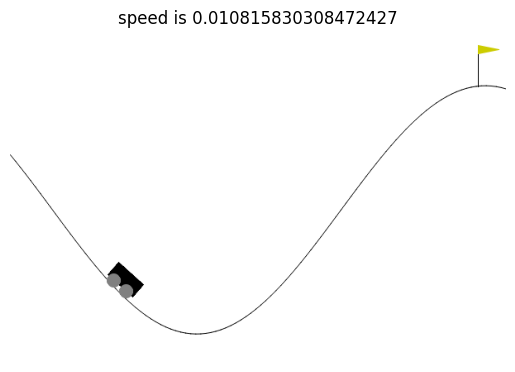

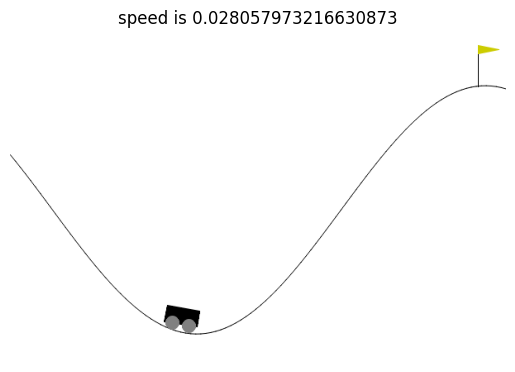

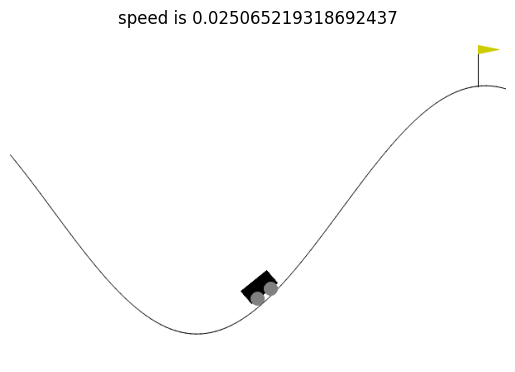

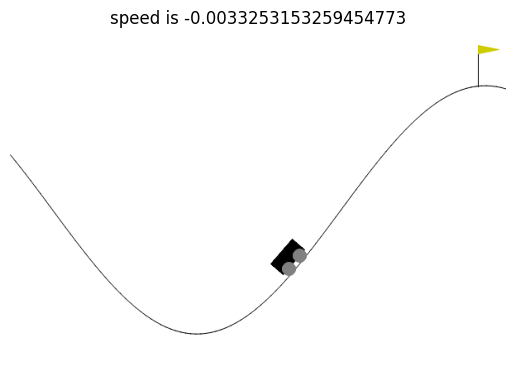

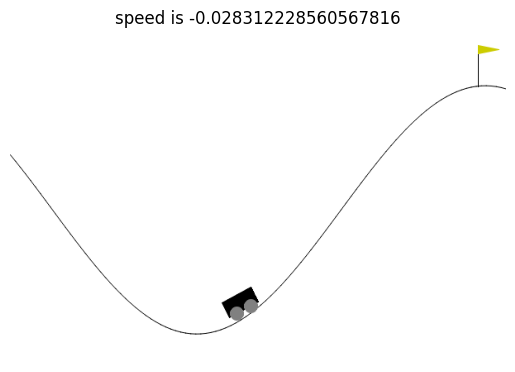

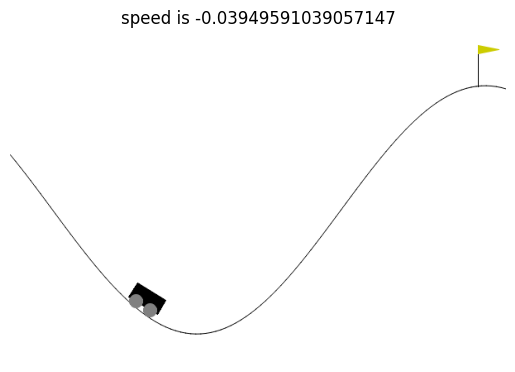

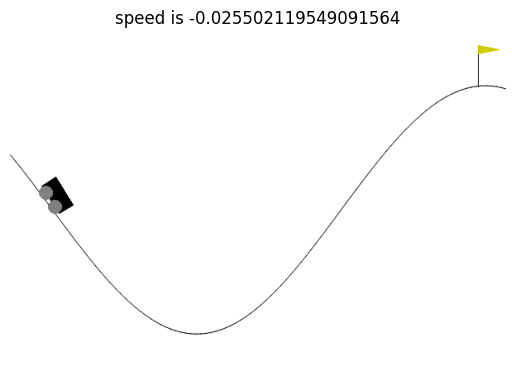

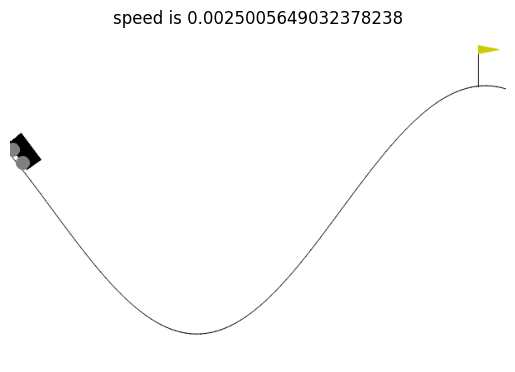

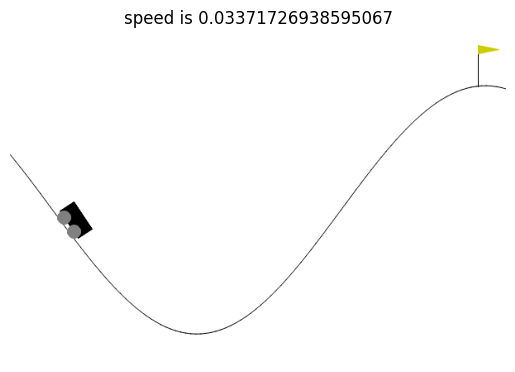

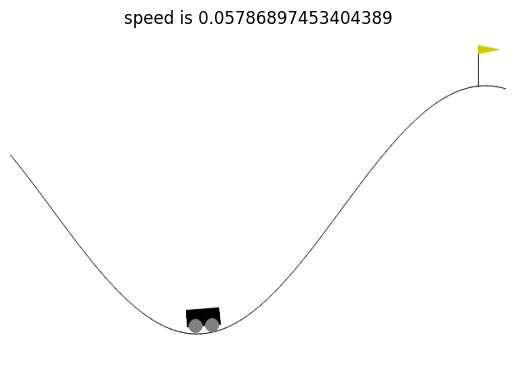

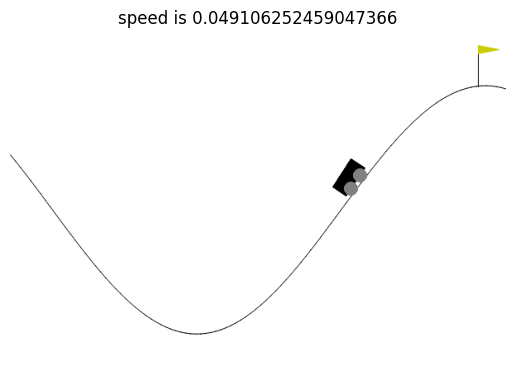

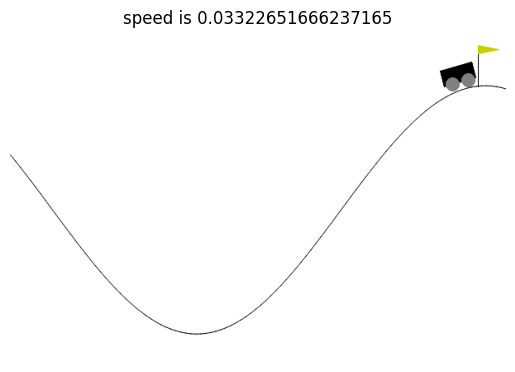

In [38]:
state = env.reset()[0]
discrete_state = mountain_car_sarsa.get_discrete_state(state)
done = False
step_count = 0

while not done:
    action = mountain_car_sarsa.policy[discrete_state]
    new_state, _, terminated, truncated, _ = env.step(action)
    if step_count % 10 == 0:
        visualize(env)
    discrete_state = mountain_car_sarsa.get_discrete_state(new_state)
    step_count += 1
    if terminated or truncated:
        done = True

Is there any difference between the two algorithms? Compare results and explain why.

Answer:

Yes, there are differences between the Q-learning and SARSA algorithms, both in terms of their update rules and their behavior:

1. **Update Rule**:
    - **Q-learning**: In Q-learning, the Q-value update is based on the maximum Q-value of the next state, regardless of the action taken in the next state. It is an off-policy algorithm.
    - **SARSA**: In SARSA, the Q-value update involves the Q-value of the next state-action pair, considering the action taken in the next state. It is an on-policy algorithm.

2. **Behavior**:
    - **Q-learning**: Q-learning often learns the optimal policy more efficiently compared to SARSA, especially in deterministic environments or when exploration is not costly. It can sometimes overestimate the values of actions due to always choosing the maximum Q-value.
    - **SARSA**: SARSA, being an on-policy algorithm, generally learns safer policies and is more conservative in its action selection. It tends to learn more robust policies and is less sensitive to initial exploration settings.

3. **Exploration vs. Exploitation**:
    - **Q-learning**: Q-learning separates exploration and exploitation completely. It explores randomly during training but exploits learned values during action selection. This can lead to more aggressive exploration.
    - **SARSA**: SARSA incorporates exploration and exploitation within the same learning process. It uses the current policy (epsilon-greedy) both for exploration and exploitation. This can lead to more balanced exploration and exploitation.

4. **Performance**:
    - The performance of Q-learning and SARSA can vary depending on the specific problem, the environment dynamics, and the exploration strategy. In some scenarios, Q-learning may converge faster to the optimal policy, while in others, SARSA may learn a more robust policy.

5. **Convergence**:
    - **Q-learning**: Q-learning converges to the optimal policy under certain conditions, such as having a sufficiently small learning rate and exploring all state-action pairs infinitely often.
    - **SARSA**: SARSA also converges to an optimal policy under similar conditions. However, due to its on-policy nature, it tends to converge to a safer policy, which might not always be the globally optimal policy.

In conclusion, the choice between Q-learning and SARSA depends on the specific characteristics of the problem, such as the nature of the environment, the importance of exploration, and the desired behavior of the agent. In some cases, Q-learning might lead to faster convergence to the optimal policy, while in others, SARSA might be more suitable for learning a safer and more robust policy.

